In [1]:
import hmbh as h

In [2]:
path = '../data/'

folder = ['GC_chi01_output_noclusterevolv', 'NSC_chi01_output_noclusterevolv',
               'YSC_chi01_output_noclusterevolv']
    
metallicity = ['0.0002', '0.002', '0.02', '0.0004', '0.004', '0.006', '0.0008',
                   '0.008', '0.0012', '0.012', '0.0016', '0.016']

cols = ['c0', 'c1', 'c2', 'c3', 'c4', 'c7', 'c8', 'c9', 'c13', 'c15', 'c16', 'c17', 'c25', 'c27'] # select bold columns -> most important for this analysis

new_cols = ['ID', 'bh_mass1', 'bh_mass2', 'spin1', 'spin2', 'semimajor', 'i_ecc', 'time_dyn', 'time_merge', 
'remnant_mass', 'remnant_spin', 'escape_vel', 'cluster_mass', 'n_gen']

In [3]:
df = h.create_dataset(path, folder, metallicity, cols)

df = h.rename_columns(df, new_cols)

df = h.get_label_ngen(df)

In [4]:
df.head(5)

ID,bh_mass1,bh_mass2,spin1,spin2,semimajor,i_ecc,time_dyn,time_merge,remnant_mass,remnant_spin,escape_vel,cluster_mass,n_gen,label,met,label_ngen
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,i32
"""2.0.0""",28.497396,23.848129,0.734705,0.014536,118.322458,0.660875,73.920947,1746.620064,49.029268,0.816124,43.17523,456627.739325,2,0,0.0002,0
"""18.0.0""",38.172095,29.913274,0.753993,0.161852,378.031535,0.406799,38.064151,1712.47759,63.511846,0.840459,42.843056,375550.638468,2,0,0.0002,0
"""34.0.0""",60.53033,53.519905,0.720625,0.162188,608.965749,0.936663,240.687784,2461.291832,106.560909,0.825812,118.780296,5.4067e6,2,0,0.0002,0
"""38.0.0""",14.480868,13.043004,0.725751,0.111623,219.843013,0.361773,691.059977,7757.376544,25.747022,0.81898,76.422227,1.6841e6,2,0,0.0002,0
"""103.0.0""",19.224383,15.611048,0.742771,0.208234,28.765131,0.490608,2000.834621,7287.34974,32.475861,0.840732,103.880881,4.2546e6,2,0,0.0002,0


In [24]:
%%time
X, y, X_train, y_train, X_test, y_test = h.data_preprocessing(df, n_sample=6800, label='label', test_size=0.2, balanced_label=True)


RF, y_pred = h.simple_RF(X_train, y_train, X_test)

Label count before balancing:
 1    2788313
0     433627
2       7207
Name: label, dtype: int64 

Label count after balancing:
 1    7207
0    7207
2    7207
Name: label, dtype: int64

Label count after sampling:
 0    2285
2    2264
1    2251
Name: label, dtype: int64

X_train shape: (5440, 13)
X_test shape: (1360, 13)
y_train shape: (5440,)
y_test shape: (1360,)
CPU times: user 2.31 s, sys: 2.86 s, total: 5.18 s
Wall time: 3.15 s



Training Score:        0.9950367647058823
Test score (Accuracy): 0.9088235294117647



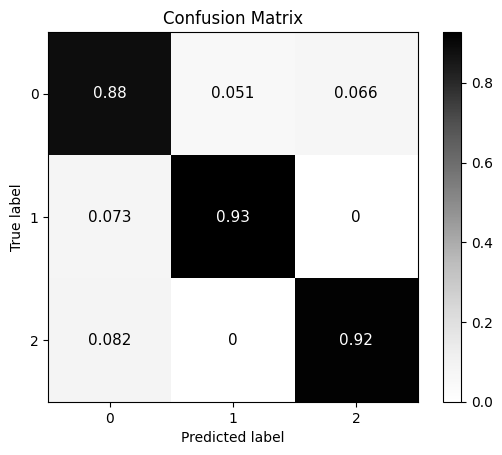

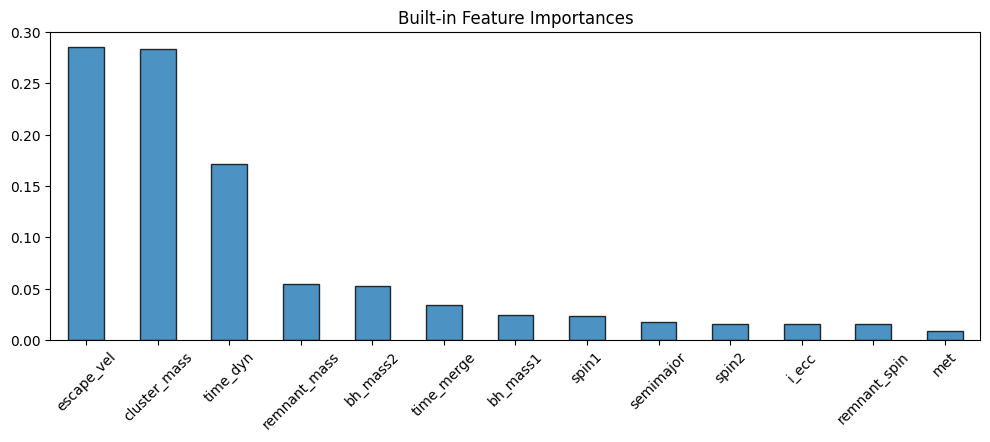

In [25]:
h.model_evaluation(RF, X, y, X_train, y_train, X_test, y_test, y_pred)

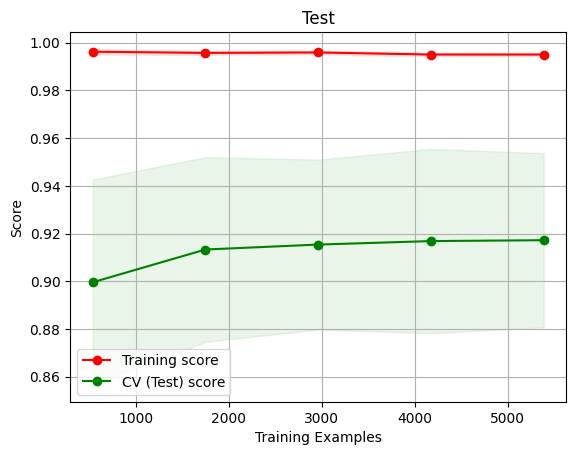

CPU times: user 894 ms, sys: 243 ms, total: 1.14 s
Wall time: 3.8 s


In [35]:
%%time
h.plot_learning_curve(RF, X_train, y_train, cv=100, title='Test', n_jobs=25)

In [30]:
y_train.shape[0]

5440